In [1]:
import os
current_path = os.getcwd()
print(current_path)
os.chdir("..")
current_path = os.getcwd()
print(current_path)

/home/xzhang/Documents/我的模型/experiments
/home/xzhang/Documents/我的模型


In [2]:
# 第二个实验测试
# 我已经选择了合适的学习率, 打算跑1000次然后记录图片并且查看相应的降噪成果, 没啥东西就用这个跑
# 模型相关
import torch
from models.DIP_2D import DIP_2D
import pytorch_lightning as pl
import numpy as np

# 画图相关
import matplotlib.pyplot as plt

# 文件读写相关
import csv
from config.config import *
import pandas as pd
import csv

# 自定义函数
from utils.pre_utils import *

from functools import partial

import datetime

/home/xzhang/miniconda3/envs/dip/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/xzhang/miniconda3/envs/dip/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
path_input = "data/noisy_images/uniform_noise.npy"
path_ground_truth = "data/ground_truth/ground_truth.npy"
path_target = "data/corrupted_images/BSREM_it30.npy"

staaaaaaaaaaand


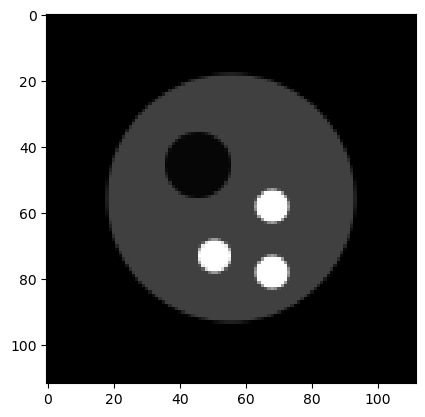

In [4]:
image_net_input = np.load(path_input)

# image_net_input_scale,param1_scale_im_net,param2_scale_im_net = rescale_imag(image_net_input,"standardization") 
# image_net_input_torch = torch.Tensor(image_net_input_scale)

image_net_input_torch = torch.Tensor(image_net_input)
image_net_input_torch = image_net_input_torch.view(1,1,PETImage_shape[0],PETImage_shape[1],PETImage_shape[2])
image_net_input_torch = image_net_input_torch[:,:,:,:,0]

ground_truth = np.load(path_ground_truth)

image_corrupt = np.load(path_target)
image_corrupt_input_scaled,param1_scale_im_corrupt,param2_scale_im_corrupt = rescale_imag(image_corrupt,"standardization") # 标准化图片, 减去平均值，除以标准差，参数1是mean，参数2是std
image_corrupt_torch = torch.Tensor(image_corrupt_input_scaled)
image_corrupt_torch = image_corrupt_torch.view(1,1,PETImage_shape[0],PETImage_shape[1],PETImage_shape[2])
image_corrupt_torch = image_corrupt_torch[:,:,:,:,0]

plt.imshow(ground_truth, cmap='gray')
plt.show()  

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/xzhang/miniconda3/envs/dip/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:1292: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  rank_zero_warn(

   | Name       | Type       | Params
-------------------------------------------
0  | deep1      | Sequential | 2.5 K 
1  | down1      | Sequential | 2.4 K 
2  | deep2      | Sequential | 14.0 K
3  | down2      | Sequential | 9.3 K 
4  | deep3      | Sequential | 55.7 K
5  | down3      | Sequential | 37.1 K
6  | deep4      | Sequential | 221 K 
7  | up1        | Sequential | 73.9 K
8  | deep5      | Sequential | 74.1 K
9  | up2        | Sequential | 18.5 K
10 | deep6      | Sequential | 18.6 K
11 | up3        | Sequential | 4.7 K 
12 | deep7      | Sequential | 2.5 K 
13 | positivity | ReLU       | 0     
--------------------------------------

Number of params: 535251
Epoch 0: 100%|██████████| 1/1 [00:00<00:00, 12.56it/s, loss=1.96, v_num=0]

/home/xzhang/miniconda3/envs/dip/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([112, 112, 1])) that is different to the input size (torch.Size([1, 1, 112, 112])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 99:   0%|          | 0/1 [00:00<00:00, 767.48it/s, loss=0.0822, v_num=0]  0
Succesfully save in: data/output_images/output_aaa_99.img
Epoch 199:   0%|          | 0/1 [00:00<00:00, 820.32it/s, loss=0.0472, v_num=0]  0
Succesfully save in: data/output_images/output_aaa_199.img
Epoch 299:   0%|          | 0/1 [00:00<00:00, 835.52it/s, loss=0.0189, v_num=0]  0
Succesfully save in: data/output_images/output_aaa_299.img
Epoch 399:   0%|          | 0/1 [00:00<00:00, 804.43it/s, loss=0.0118, v_num=0]  0
Succesfully save in: data/output_images/output_aaa_399.img
Epoch 499:   0%|          | 0/1 [00:00<00:00, 817.13it/s, loss=0.0079, v_num=0]   0
Succesfully save in: data/output_images/output_aaa_499.img
Epoch 599:   0%|          | 0/1 [00:00<00:00, 636.37it/s, loss=0.00644, v_num=0]  0
Succesfully save in: data/output_images/output_aaa_599.img
Epoch 699:   0%|          | 0/1 [00:00<00:00, 1165.41it/s, loss=0.00544, v_num=0] 0
Succesfully save in: data/output_images/output_aaa_699.img
Epoch

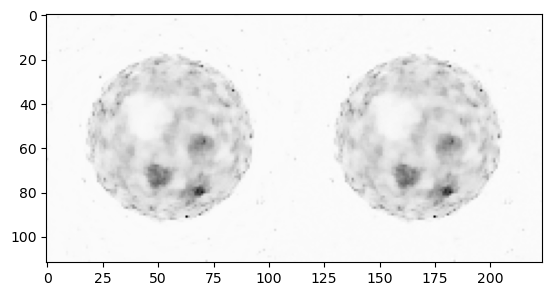

In [5]:

 # 加载数据
train_dataset = torch.utils.data.TensorDataset(image_net_input_torch,image_corrupt_torch)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=1) 

# 加载模型
model = DIP_2D(param1_scale_im_corrupt, param2_scale_im_corrupt, config,'data/Algo/',
            "nested",all_images_DIP="False",global_it=-100, suffix='aaa',last_iter=-1,ground_truth=ground_truth,target=image_corrupt,initial_param='kaiming_norm')
# model.init_weights()
model_class = DIP_2D

#定义tensorboard
checkpoint_simple_path = os.getcwd() + '/test2_logs'
# experiment = 24
name=str(datetime.datetime.now())

logger = pl.loggers.TensorBoardLogger(save_dir=checkpoint_simple_path,name=name)#version=format(experiment), name=name)
trainer = pl.Trainer(max_epochs=config["sub_iter_DIP"],log_every_n_steps=1,logger=logger)#, callbacks=[checkpoint_callback, tuning_callback, early_stopping_callback], logger=logger,gpus=gpus, accelerator=accelerator, profiler="simple")

# 训练模型
trainer.fit(model, train_dataloader)
out = model(image_net_input_torch)

image_out = out.view(PETImage_shape[0],PETImage_shape[1],PETImage_shape[2]).detach().numpy()
image_concat = np.concatenate((image_corrupt, destand_numpy_imag(image_out,param1_scale_im_corrupt,param2_scale_im_corrupt)), axis=1)
image_reversed =np.max(image_concat)-image_concat

plt.imshow(image_reversed, cmap='gray')
plt.show()  

In [1]:
from test import *

psnr_list,mse_gt_list = main()


/home/xzhang/miniconda3/envs/dip/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/xzhang/miniconda3/envs/dip/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/xzhang/miniconda3/envs/dip/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:1292: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  rank_zero_warn(

   | Name       | Type       | Params
-------------------------------------------

/home/xzhang/Documents/我的模型/experiments
current working directory switched to /home/xzhang/Documents/我的模型
staaaaaaaaaaand
Number of params: 535251
Epoch 99:   0%|          | 0/1 [00:00<00:00, 757.37it/s, loss=0.093, v_num=0]   0
Succesfully save in: data/output_images/output_aaa_99.img
Epoch 199:   0%|          | 0/1 [00:00<00:00, 663.34it/s, loss=0.0585, v_num=0]  0
Succesfully save in: data/output_images/output_aaa_199.img
Epoch 299:   0%|          | 0/1 [00:00<00:00, 900.84it/s, loss=0.0356, v_num=0]  0
Succesfully save in: data/output_images/output_aaa_299.img
Epoch 399:   0%|          | 0/1 [00:00<00:00, 794.68it/s, loss=0.0182, v_num=0]  0
Succesfully save in: data/output_images/output_aaa_399.img
Epoch 499:   0%|          | 0/1 [00:00<00:00, 803.66it/s, loss=0.0109, v_num=0]  0
Succesfully save in: data/output_images/output_aaa_499.img
Epoch 599:   0%|          | 0/1 [00:00<00:00, 716.00it/s, loss=0.0073, v_num=0]   0
Succesfully save in: data/output_images/output_aaa_599.img
Ep

In [2]:
filename = 'data/results/statistics/' + str(datetime.datetime.now()).split(' ')[0] +'.csv'
save_csv(filename,psnr_list,mse_gt_list)

In [3]:
tb = read_csv(filename)

   iters       psnr       mse_gt
0      0  14.829224  5914.921072
1      1  15.168590  5905.654510
2      2  14.373932  5876.575806
3      3  16.979762  5833.439861
4      4  17.458912  5824.955982
             iters         psnr       mse_gt
count  1000.000000  1000.000000  1000.000000
mean    499.500000    26.783955  5808.363708
std     288.819436     1.188762     5.464599
min       0.000000    14.373932  5806.179128
25%     249.750000    26.825603  5807.334503
50%     499.500000    27.049225  5807.517409
75%     749.250000    27.198197  5807.852958
max     999.000000    27.834444  5914.921072
